## data_understanding.ipynb

### ==============================
### Phase 2: Data Understanding
### ==============================

In [33]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Plot style
sns.set(style="whitegrid")

In [ ]:
# --- 2. Mount Data from Drive---
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# --- 3. Load Data ---

events = pd.read_csv('/content/drive/MyDrive/data/TMP/events.csv')
category_tree = pd.read_csv('/content/drive/MyDrive/data/TMP/category_tree.csv')
df_prop1  = pd.read_csv('/content/drive/MyDrive/data/TMP/item_properties_part1.1.csv')
df_prop2 = pd.read_csv('/content/drive/MyDrive/data/TMP/item_properties_part2.csv')

item_props = pd.concat([df_prop1, df_prop2])

In [ ]:
# --- 4. Inspect Dataset ---
print("Events shape:", events.shape)
print("Item Properties shape:", item_props.shape)
print("Category Tree shape:", category_tree.shape)

Events shape: (2756101, 5)
Item Properties shape: (20275902, 4)
Category Tree shape: (1669, 2)


In [ ]:
print("\nEvents sample:")
display(events.head())


Events sample:


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [ ]:
print("\nItem Properties sample:")
display(item_props.head())


Item Properties sample:


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [ ]:
print("\nCategory Tree sample:")
display(category_tree.head())


Category Tree sample:


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
# --- 5. Check for Missing Values ---
print("\nMissing values in Events:")
print(events.isnull().sum())

print("\nMissing values in Item Properties:")
print(item_props.isnull().sum())

print("\nMissing values in Category Tree:")
print(category_tree.isnull().sum())


Missing values in Events:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

Missing values in Item Properties:
timestamp    0
itemid       0
property     0
value        0
dtype: int64

Missing values in Category Tree:
categoryid     0
parentid      25
dtype: int64


In [ ]:
# --- 6. Convert timestamp to datetime ---
def to_datetime(ts):
    return datetime.utcfromtimestamp(int(ts)/1000)

events['datetime'] = events['timestamp'].apply(to_datetime)
item_props['datetime'] = item_props['timestamp'].apply(to_datetime)

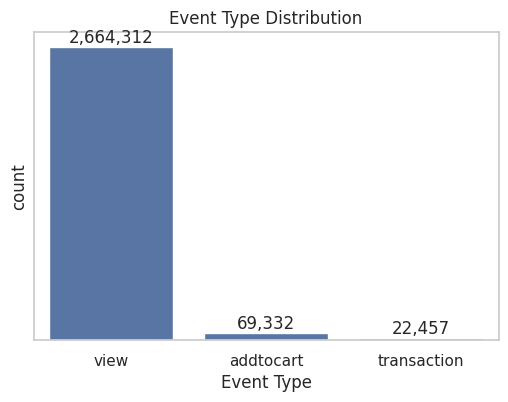

In [ ]:
# --- 7. Event Type Distribution ---
plt.figure(figsize=(6,4))
ax = sns.countplot(data=events, x='event')
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
# Remove y-axis labels
plt.yticks([])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

In [ ]:
# --- 8. Unique Counts ---
print("\nUnique Visitors:", events['visitorid'].nunique())
print("Unique Items in Events:", events['itemid'].nunique())
print("Unique Items in Item Properties:", item_props['itemid'].nunique())


Unique Visitors: 1407580
Unique Items in Events: 235061
Unique Items in Item Properties: 417053


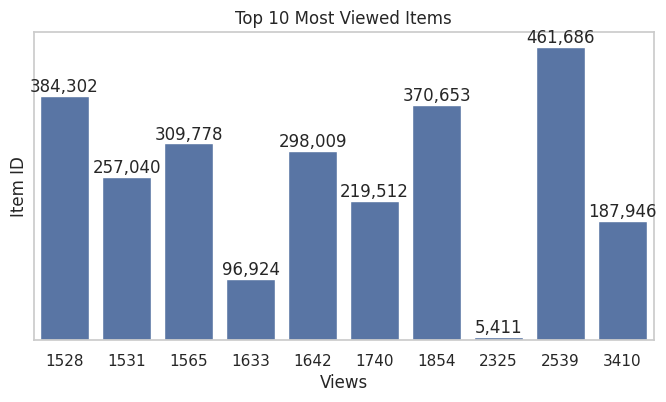

In [ ]:
# --- 9. Top 10 Most Viewed Items ---
top_items = events[events['event'] == 'view']['itemid'].value_counts().head(10)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Most Viewed Items")
plt.xlabel("Views")
plt.ylabel("Item ID")

# Remove y-axis labels
plt.yticks([])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

In [ ]:
# --- 10. Views vs AddToCart vs Transactions Over Time ---
events_grouped = events.groupby(['datetime', 'event']).size().reset_index(name='count')
plt.figure(figsize=(12,5))
sns.lineplot(data=events_grouped, x='datetime', y='count', hue='event')
plt.title("Event Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.legend(title="Event Type", loc='upper right')
plt.show()

In [ ]:
# --- 11. Save a Summary Report ---
summary = {
    "events_shape": events.shape,
    "item_properties_shape": item_props.shape,
    "category_tree_shape": category_tree.shape,
    "unique_visitors": events['visitorid'].nunique(),
    "unique_items": events['itemid'].nunique(),
    "unique_categories": category_tree['categoryid'].nunique()
}

summary_df = pd.DataFrame(list(summary.items()), columns=["Metric", "Value"])
summary_df.to_csv("../content/drive/MyDrive/data/TMP/data_summary.csv", index=False)

print("\nSummary saved to ../TMP/data_summary.csv")